# Descenso del Gradiente

<img src="1.jpg"></img>

~ Basado en el video de <b>DOT.CSV</b>: [Descenso del Gradiente](https://youtu.be/-_A_AAxqzCg).

~ Imágenes extraídas desde el curso de Andrew NG de Coursera (Machine Learning de Standford University), canal de YouTube de DOT.CSV, Wikipedia, entre otros.

~ Recomendado saber sobre cursos de cálculo de universidad (cálculo I, II y III), programación, álgebra y estadística.

## ¿Qué es el descenso del gradiente?

Este algoritmo lo encontraremos dentro de todo el mundo de la IA. En general, es una técnica de optimización: se busca en una función los puntos críticos, en este caso, los mínimos, de forma de minimizar el error de nuestra hipótesis, y por ende, minimizar la función de coste.

Ésto se realiza en función de parámetros Y, tal como hablamos en el notebook anterior, intentando minimizar el error de nuestra hipótesis en base a los valores reales, pero esta vez, no de forma analítica (despejando cada uno de los valores), sino que, realizando, paso a paso, la mejora de nuestra hipótesis a través de un ciclo iterativo.

<img src="2.png"></img>

En palabras sencillas, hacemos que nuestra hipótesis haga mejor su tarea en muchísimos pasos, buscando la convergencia al mínimo error.

<img src="3.png"></img>

El descenso del gradiente se suele utilizar para optimizar funciones no convexas, dado que este tipo de funciones, de forma analítica, tienen muchos puntos críticos, de forma que el despejar la derivada para cada uno de estos mínimos locales, conllevaría a un proceso ineficiente.

<img src="4.png"></img>

Para esta situación, trabajaremos con gráficas de superficie, en 3D, por lo que estaremos trabajando con <b>derivadas parciales</b>... Pero, ¿no es que las derivadas parciales solo entregan la pendiente en solo una determinada dirección? Pues, sí. 

Es por ello que necesitamos del equivalente a la derivada 2D en 3D, es decir, ¡el gradiente! Sabemos que, el gradiente, nos entrega la dirección en que debemos dirigirnos en nuestra función para así obtener el mayor incremento en el valor, por lo que, si deseamos obtener los mínimos, deberemos anteponerle un signo menos para obtener el mayor decremento en la función. Si ésto no se entendió, tranquilidad...

<img src="5.jpg"></img>

Dijimos que, los parámetros Θ se obtienen por iteración, ¿cierto?
Sí, y de hecho, obtendremos el mínimo error a través del cambio en los parámetros y su evaluación en la minimización de la función de costo, de forma que, a medida se evalúen los parámetros, esta derivada tenderá a disminuir, terminando por converger. 
Por consiguiente, obtendremos los parámetros Θs tras un determinado número de iteraciones, que, con mayor precisión, nos brindarán una mejor hipótesis para ajustarnos al mínimo error a nuestros valores Y</b>.

<img src="6.png"></img>

Dudas comunes:

• ¿Con qué valores deben iniciar los parámetros?

Pues, iniciamos con valores aleatorios, y a medida optimicemos, estos valores irán cambiando hasta obtener el mejor ajuste.

• ¿Cuántas iteraciones se necesitan?

Dependerá del problema. Hay algoritmos que necesitan desde 100 iteraciones a millones de iteraciones.

Finalmente, y en una explicación rápida (dado que ya hablamos sobre la fórmula), 'Alpha' es denominado como "índice de aprendizaje" o "learning rate", cuya función es controlar el tamaño de estos pasos arbitrarios, lo que implica que, si alpha es grande implica que daremos un gran paso agresivo en descenso, y si alpha es pequeño, daremos pequeños pasos  hacia el descenso.

Para más detalles, [se puede consultar el notebook anterior](https://github.com/adinamarca/notebooks/blob/main/PY/ML/1_regresion_lineal/notebook.ipynb).


In [1]:
# Numpy se utiliza como una librería de cálculo numérico, álgebra lineal (matrices), etc.
import numpy as np 

# Extensión de Numpy
import scipy as sc

# Para visualización de datos
import matplotlib.pyplot as plt 

## Optimizamos funciones siempre y cuando sean derivables

En este caso, optimizaremos una función cualquiera (a modo de ejemplo).

Utilizaremos una función con dos parámetros para poder realizar la visualización, dado que si tuviéramos un número mayor de parámetros, no podríamos visualizarlo.

En la realidad, <b>podríamos encontrarnos con problemas más complejos</b>.

Si no sabes que son las funciones anónimas en Python, [te recomiendo este enlace](https://cosasdedevs.com/posts/como-se-usan-las-funciones-anonimas-o-lambda-en-python/).

<img src="7.jpg"></img>



In [5]:
"""
Declaramos la función anónima.

th: vector de parámetros (referencia a Z para ML).

th = [x, y]

"""
func = lambda th: np.sin(1/2 * th[0] ** 2 - 1 / 4 * th[1] **2 + 3) * np.cos(2 * th[0] + 1 - np.e** th[1])

# Probando la función
func([2, 3])

-0.31008668289100466

## Visualizando el algoritmo

Una forma de visualizar nuestra función de costo, es a través de las curvas de nivel.

Las curvas de nivel son una especie de mapa topográfico, que da cuenta de las alturas en un plano 2D. En este sentido, es útil para realizar la verificación de que nuestro algoritmo funciona (dado que debería tener a converger a un mínimo local).

Para generar este mapa, lo que haremos será crear un vector con una secuencia de valores de X, con una secuencia de valores de Y, y para cada una de las combinaciones de estos valores, lo evaluaremos en nuestra función 'func'.

Para ello, utilizaremos la función [np.linspace (espacio lineal de numpy)](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html).

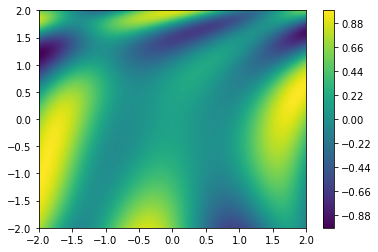

In [16]:
func = lambda th: np.sin(1/2 * th[0] ** 2 - 1 / 4 * th[1] **2 + 3) * np.cos(2 * th[0] + 1 - np.e** th[1])

res = 100

# Espacio lineal de numpy, nos generará un vector de -2 a 2, con 100 valores ('res': resolución de mapa con cien coordenadas).

# Interpolación de los valores -2, 2 y res
_X = np.linspace(-2, 2, res)
_Y = np.linspace(-2, 2, res)


# Para cada combinación, queremos generar nuevos valores a partir de la función. Generaremos una matriz de 100*100, por lo cual deberemos generar una matriz con elementos nulos con tamaño res*res
_Z = np.zeros((res, res))

# La función enumerate recorre el vector. Para cada elemento devuelve su índice (ix) y el valor (x).

for ix, x in enumerate(_X):
    for iy, y in enumerate(_Y):
        # Lo que nos falta es decir en qué índice queremos guardar el valor en '_Z'
        _Z[iy, ix] = func([x, y])

# La curva de nivel (cada color representa una altura distinta de la superficie 3D)

# Recordar anteponer ? en una función para ver su documentación rápidamente

# Superficie con trazados con contour
plt.contour(_X, _Y, _Z, 100)

# Superficie sólida con contourf
plt.contourf(_X, _Y, _Z, 100)

# Para ver la leyenda de colores
plt.colorbar()

plt.show()

## Análisis de la curva de nivel

De la gráfica anterior, podemos observar que los máximos locales estarían en las zonas amarillas, mientras los mínimos locales en las zonas oscuras.

## Generando un punto aleatorio

Ahora, generaremos una coordenada arbitraria, para desde esa coordenada, poco a poco, acercarnos a un mínimo local.

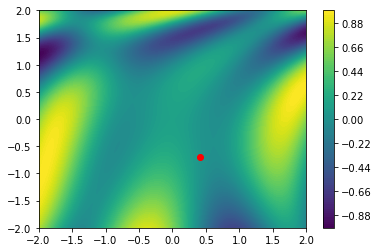

In [21]:
# Superficie sólida con contourf
plt.contourf(_X, _Y, _Z, 100)

# Para ver la leyenda de colores
plt.colorbar()

# Generamos un vector theta con dos valores aleatorios, sin embargo, el valor estará dentro del intervalo del 0 a 1, y necesitamos desde el -0.88 al 0.88
theta = np.random.rand(2) * 4 - 2

# Graficamos la coordenada
plt.plot(theta[0], theta[1], "o", c="red")

plt.show()

Con lo anterior hecho, tendríamos el sistema listo para empezar a realizar nuestro algoritmo del descenso del gradiente.

## Analogía

<img src="8.png"></img>

Ahora que tenemos nuestra coordenada generada de forma aleatoria, tendríamos lo equivalente a tener una <b>latitud y longitud</b>, que nos llevarían a una superficie de un mapa. De esta forma, nos interesa, tantear alrededor cuál es la inclinación del terreno, debiendo movernos en la que existe la mayor pendiente en descenso (esto es lo que haría el gradiente negativo a través de las derivadas parciales).



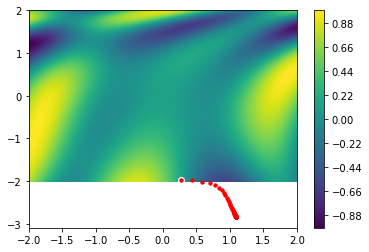

In [42]:
"""
Repetimos el código anterior
"""

# Superficie sólida con contourf
plt.contourf(_X, _Y, _Z, 100)

# Para ver la leyenda de colores
plt.colorbar()

# Generamos un vector theta con dos valores aleatorios, sin embargo, el valor estará dentro del intervalo del 0 a 1, y necesitamos desde el -0.88 al 0.88
theta = np.random.rand(2) * 4 - 2

"""
Aproximación de derivadas parciales con "diferencias mínimas". Sin embargo, normalmente utilizaríamos una librería de cálculo numérico con autodiferenciación.

El método en sí, consiste en calcular pequeñas diferencias en los parámetros de entrada (cuánto varía el output en un incremento en el input).

"""

# Valor para incrementar
h = 0.001
lr = 0.001

# Generamos una copia de theta
_T = np.copy(theta)

# Graficamos la coordenada
plt.plot(theta[0], theta[1], "o", c="white")

# Grad
grad = np.zeros(_T.shape[0])

# (1) Aquí, añadimos las iteraciones.
for _ in range(10000):
    # El valor 'it' nos indica el índice del bucle.
    # Lo siguiente calcula el gradiente para una iteración. Sin embargo, el descenso del gradiente requiere que ésto se itere una y otra vez (1).
    for it, th in enumerate(theta):

        # Incrementamos levemente uno de los componentes de nuestro vector Z
        _T = np.copy(theta)
        _T[it] = _T[it] + h
        """
        Calculamos la derivada, evaluando cómo varía nuestra función, pasándole el vector manipulado con el pequeño incremento, frente al input original guardado en Z.
        # La diferencia es un ratio, y por ende, debemos dividirlo por el incremento que estamos calculando.
        A continuación, la derivada parcial (primer componente), es decir, la pendiente de movernos en el eje Z[0]. En la siguiente iteración, Z[1]. Ésto conformará nuestro vector 'grad'. 
        
        """
        deriv = (func(_T) - func(theta))/h
        # Guardamos el valor calculado
        grad[it] = deriv
        # El siguiente valor irá decrementando.
        # print(func(theta))
        # Cuando el número de iteraciones, el módulo, sea igual a cero, lo graficaremos:
        if(_ % 100 == 0):
            plt.plot(theta[0], theta[1], ".", c="r")

    # Actualizamos el valor de Z
    theta = theta - lr* grad

# Graficamos la coordenada


plt.show()



## Ratio de aprendizaje

Vemos que, con un $ lr = 0.0001 $ el recorrido es muy pequeño, ¿por qué? El valor del ratio es muy bajo, y por ende, se dan pasos muy pequeños por cada iteración. <b>Debemos incrementar el ratio de aprendizaje y el número de iteraciones para acelerar el proceso</b>.

De esta forma, el punto blanco parte en un punto aleatorio, y posteriormente, el recorrido llega al mínimo en las zonas oscuras.

## ¿Qué sucede si incrementamos el ratio de aprendizaje?

Recordemos que el ratio de aprendizaje es un parámetro del modelo que debemos ajustar correctamente para que la optimización sea correcta.

Este parámetro no es equivalente a los parámetros que estamos optimizando, sino que es un <b>parámetro del modelo</b>, denominados <b>hiperparámetros</b>. Éste es un campo bastante interesante, que es la <b color="red">optimización de los hiperparámetros</b>.

## Recordemos:

• Un ratio de aprendizaje pequeño implicará muchos pasos para movernos una poca distancia (ineficiente).

• Un ratio de aprendizaje elevado implicará que no convergirá el algoritmo, y terminará divergiendo. 

## Nuevamente, las librerías

Ésto, se puede programar fácilmente en cuatro líneas de código, gracias a las librerías, y son pieza clave de las redes neuronales.

## Regresión lineal

Si bien en el notebook pasado utilizamos el método de la ecuación normal (analítico o de mínimos cuadrados ordinarios) al tener una <b color="red">función convexa</b>, nada nos impide de poder utilizar el descenso del gradiente en dicho problema.